## `shizuka.plotting` test

Short notebook for testing the `shizuka.plotting` module. We test functions with differently fitted classifiers. The data used and te `AdaBoostClassifier` and `SGDClassifier` trained on the data are from `tomodachi_proj`, which we reuse for testing. We fit and pickle an additional `SGDClassifier` fitted on forest cover data, which was a multiclass problem my BAC team tackled in a previous semester.

In [1]:
from importlib import reload
from numpy import mean
import pandas as pd
import pickle
from seaborn import set as sns_set
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sys import path as sys_path

In [2]:
# import shizuka modules: first add to sys.path if need be
_shizuka_dir = "C:\\Users\\D\\START\\prog_proj\\shizuka"
if _shizuka_dir in sys_path: pass
else:
    sys_path.append(_shizuka_dir)
    print("appended _shizuka_dir to module search path")
# shizuka imports
import shizuka.plotting as spl
import shizuka.model_selection as sms

appended _shizuka_dir to module search path


c:\users\d\start\python3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\d\start\python3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\d\start\python3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

### `multiclass_stats`: binary classification case

Using data files and models from the Spotify Billboard 200 analysis done this past semester and the forest cover analysis done a couple (?) semesters ago. Not entirely true; the `GridSearchCV` objects `sgdm_gscv` and `dtc_gscv` were fitted for this testing. Check addendum for code details.

In [4]:
# read data from ./test_data
Xm_train = pd.read_csv("./test_data/Xm_train.csv")
Xm_test = pd.read_csv("./test_data/Xm_test.csv")
X_train = pd.read_csv("./test_data/X_train.csv")
X_test = pd.read_csv("./test_data/X_test.csv")
Xt_train = pd.read_csv("./test_data/Xt_train.csv")
Xt_test = pd.read_csv("./test_data/Xt_test.csv")
ym_train = pd.read_csv("./test_data/ym_train.csv")
ym_test = pd.read_csv("./test_data/ym_test.csv")
y_train = pd.read_csv("./test_data/y_train.csv")
y_test = pd.read_csv("./test_data/y_test.csv")
yt_train = pd.read_csv("./test_data/yt_train.csv")
yt_test = pd.read_csv("./test_data/yt_test.csv")
# read in sgd classifier GridSearchCV object fit on Xm_train
with open("./test_models/sgd_gscv.pickle", "rb") as sgd_gscv_file:
    sgd_gscv = pickle.load(sgd_gscv_file)
# read in ada stump classifier GridSearchCV object fit on X_train
with open("./test_models/ada_fstump_gscv.pickle", "rb") as ada_fstump_gscv_file:
    ada_fstump_gscv = pickle.load(ada_fstump_gscv_file)
# read in decision tree classifier GridSearchCV object fit on Xt_train
with open("./test_models/dtc_gscv.pickle", "rb") as dtc_gscv_file:
    dtc_gscv = pickle.load(dtc_gscv_file)
# read in sgd one vs. rest classifier GridSearchCV object fit on Xt_train
with open("./test_models/sgdm_gscv.pickle", "rb") as sgdm_gscv_file:
    sgdm_gscv = pickle.load(sgdm_gscv_file)
# get best estimators
sgdc = sgd_gscv.best_estimator_
adac = ada_fstump_gscv.best_estimator_
dtc = dtc_gscv.best_estimator_
sgdmc = sgdm_gscv.best_estimator_
# might get a lot of warnings here

First test the `multiclass_stats` function for plot behavior. Reload module automatically in cells.

5-fold cv sgdc accuracy:	0.86941
best sgdc test accuracy:	0.72086
misclassification rate for 0:	0.19425
misclassification rate for 1:	0.33489
best sgdc test precision:	0.83905
best sgdc test AUC:		0.73543


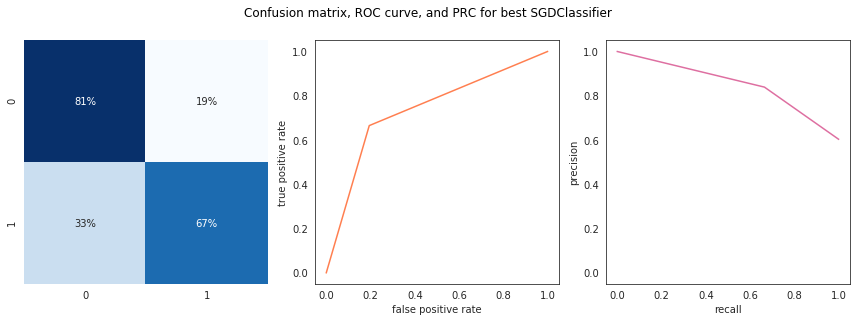

In [5]:
# test multiclass stats using typical call signature (but don't save figure)
# print out cv and best estimator accuracies (they suck by the way)
print("5-fold cv sgdc accuracy:\t{0:.5f}\nbest sgdc test accuracy:\t{1:.5f}"
      "".format(mean(sgd_gscv.cv_results_["mean_test_score"]), sgdc.score(Xm_test, ym_test)))
# reload spl
reload(spl)
# create figure but don't save; return figure, confusion matrix, and statistics
#print(ym_test.values())
fig, axs, stats_dict = spl.multiclass_stats(sgdc, Xm_test, ym_test, best_model = True, 
                                            style = "white")
# misclassification rates (although this is two class, i try to be general)
for mcr, i in zip(stats_dict["mc_rates"], range(stats_dict["n_classes"])):
    print("misclassification rate for {0}:\t{1:.5f}".format(i, mcr))
# predicted values from test feature matrix
print("best sgdc test precision:\t{0:.5f}\nbest sgdc test AUC:\t\t{1:.5f}" 
      "".format(stats_dict["precision"], stats_dict["auc"]))

5-fold cv adac accuracy:	0.78460
best adac test accuracy:	0.78583
misclassification rate for 0:	0.31639
misclassification rate for 1:	0.14703
best adac test precision:	0.80410
best adac test AUC:		0.76829


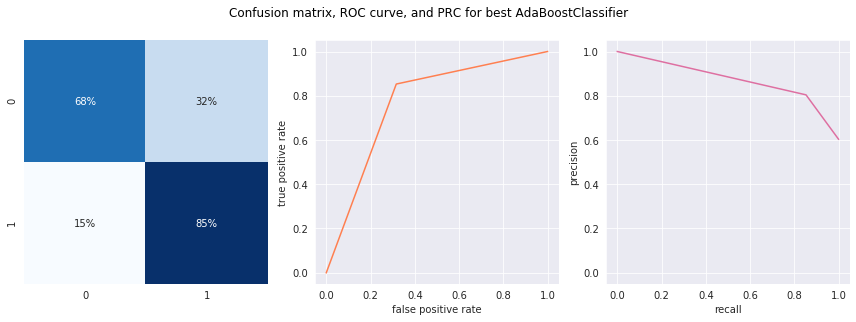

In [6]:
# repeat test but with the full ada stump model so bar plot is different
# print out cv and best estimator accuracies (they suck by the way)
print("5-fold cv adac accuracy:\t{0:.5f}\nbest adac test accuracy:\t{1:.5f}"
      "".format(mean(ada_fstump_gscv.cv_results_["mean_test_score"]), 
                adac.score(X_test, y_test)))
# reload spl
reload(spl)
# create figure but don't save; return figure, confusion matrix, and statistics
fig, cmat, stats_dict = spl.multiclass_stats(adac, X_test, y_test, best_model = True)
# misclassification rates (although this is two class, i try to be general)
for mcr, i in zip(stats_dict["mc_rates"], range(stats_dict["n_classes"])):
    print("misclassification rate for {0}:\t{1:.5f}".format(i, mcr))
# predicted values from test feature matrix
print("best adac test precision:\t{0:.5f}\nbest adac test AUC:\t\t{1:.5f}" 
      "".format(stats_dict["precision"], stats_dict["auc"]))

### `multiclass_stats`: multiclass classification case

Using the forest data used in a previous semester's analysis for multiclass case. Test `multiclass_stats`.

5-fold cv dtc accuracy:	0.93169
best dtc test accuracy:	0.93924
misclassification rate for 0:	0.06178
misclassification rate for 1:	0.05225
misclassification rate for 2:	0.06514
misclassification rate for 3:	0.16833
misclassification rate for 4:	0.15538
misclassification rate for 5:	0.12326
misclassification rate for 6:	0.04750
best dtc test macro precision:	0.90964
best dtc test micro precision:	0.93924
best dtc test ovr AUC:		(0.95097, 0.94928, 0.96528, 0.91549, 0.92115, 0.9365, 0.97531)
best dtc test ovr precision:	(0.93721, 0.94782, 0.93473, 0.86183, 0.85859, 0.87801, 0.94929)


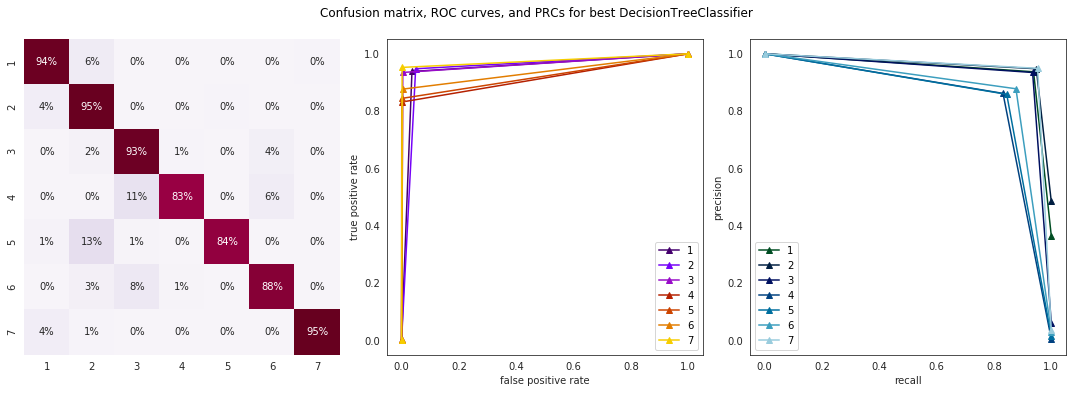

In [8]:
# test multiclass stats using typical call signature (but don't save figure)
print("5-fold cv dtc accuracy:\t{0:.5f}\nbest dtc test accuracy:\t{1:.5f}"
      "".format(mean(dtc_gscv.cv_results_["mean_test_score"]), dtc.score(Xt_test, yt_test)))
# reload mcs
reload(spl)
# create figure; return figure, confusion matrix, and statistics
fig, cmat, stats_dict = spl.multiclass_stats(dtc, Xt_test, yt_test, best_model = True,
                                             norm_true = True, cmaps = ("PuRd", "gnuplot", "ocean"), 
                                             style = "white", outfile = "./test_figures/dtc_treeplots.png",
                                             marker = "^", cc = (0, 0.15), figsize = (15, 5.5))
# misclassification rates
for mcr, i in zip(stats_dict["mc_rates"], range(stats_dict["n_classes"])):
    print("misclassification rate for {0}:\t{1:.5f}".format(i, mcr))
# predicted values from test feature matrix
print("best dtc test macro precision:\t{0:.5f}\nbest dtc test micro precision:\t{1:.5f}\n"
      "best dtc test ovr AUC:\t\t{2}" .format(stats_dict["macro_precision"], 
                                          stats_dict["micro_precision"], 
                                          tuple(map(lambda x: round(x, 5), 
                                                    stats_dict["auc"]))))
print("best dtc test ovr precision:\t{0}".format(tuple(map(lambda x: round(x, 5), 
                                                           stats_dict["precision"]))))

5-fold cv sgdm accuracy:	0.57603
best sgdm test accuracy:	0.64991
misclassification rate for 0:	0.33489
misclassification rate for 1:	0.24378
misclassification rate for 2:	0.72470
misclassification rate for 3:	0.48833
misclassification rate for 4:	1.00000
misclassification rate for 5:	0.92506
misclassification rate for 6:	0.50470
best sgdm test macro precision:	0.45290
best sgdm test micro precision:	0.64991
best sgdm test ovr AUC:		(0.7279, 0.70149, 0.63392, 0.75272, 0.49905, 0.53499, 0.73952)
best sgdm test ovr precision:	(0.64713, 0.66865, 0.70896, 0.29922, 0.0, 0.31624, 0.53006)


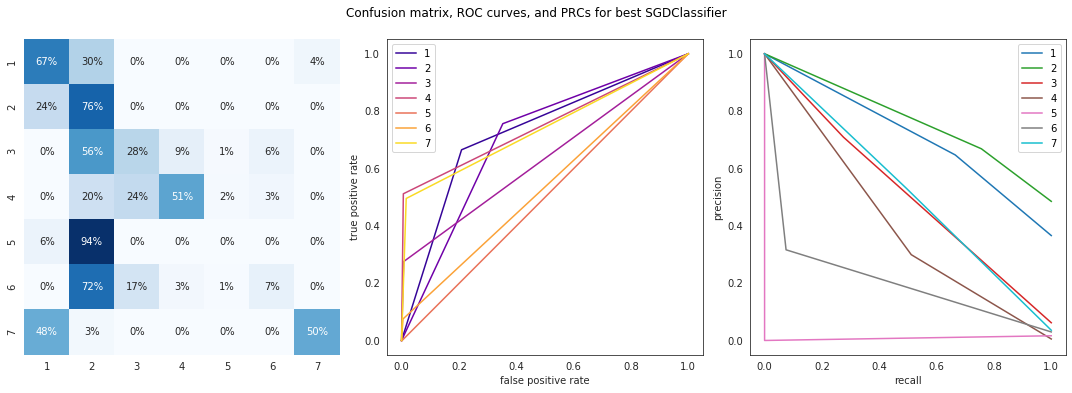

In [10]:
# test multiclass stats using typical call signature (but don't save figure)
print("5-fold cv sgdm accuracy:\t{0:.5f}\nbest sgdm test accuracy:\t{1:.5f}"
      "".format(mean(sgdm_gscv.cv_results_["mean_test_score"]), sgdmc.score(Xt_test, yt_test)))
# reload mcs
reload(spl)
# create figure but don't save; return figure, confusion matrix, and statistics
fig, cmat, stats_dict = spl.multiclass_stats(sgdmc, Xt_test, yt_test, best_model = True,
                                             norm_true = True, cmaps = ("Blues", "plasma", "tab10"), 
                                             style = "white", 
                                             outfile = "./test_figures/sgdm_treeplots.png")
# misclassification rates
for mcr, i in zip(stats_dict["mc_rates"], range(stats_dict["n_classes"])):
    print("misclassification rate for {0}:\t{1:.5f}".format(i, mcr))
# predicted values from test feature matrix
print("best sgdm test macro precision:\t{0:.5f}\nbest sgdm test micro precision:\t{1:.5f}\n"
      "best sgdm test ovr AUC:\t\t{2}" .format(stats_dict["macro_precision"], 
                                          stats_dict["micro_precision"], 
                                          tuple(map(lambda x: round(x, 5), 
                                                    stats_dict["auc"]))))
print("best sgdm test ovr precision:\t{0}".format(tuple(map(lambda x: round(x, 5), 
                                                           stats_dict["precision"]))))

### `coef_plot`: binary classification case

We again use the Spotify Billboard 200 data and models.

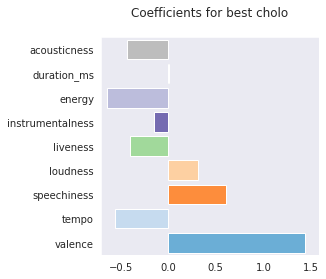

In [11]:
reload(spl)
# make plot of the coefficients/feature importances but don't save
fig, axs = spl.coef_plot(sgdc, Xm_train.columns, best_model = True, style = "dark", model_name = "cholo")

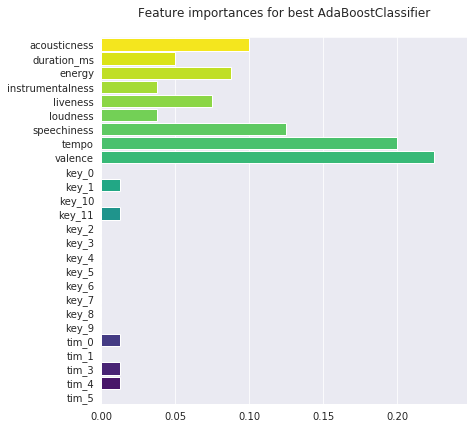

In [12]:
reload(spl)
# make plot of the coefficients/feature importances but don't save
fig, axs = spl.coef_plot(adac, X_train.columns, best_model = True, cmap = "viridis", cc = 0)

### `coef_plot`: multiclass classification case

We again use the tree cover type data and the `DecisionTreeClassifier` we trained in this notebook.

Note: the following cell doesn't really count as a multiclass case, since feature importances are not one vs. rest.

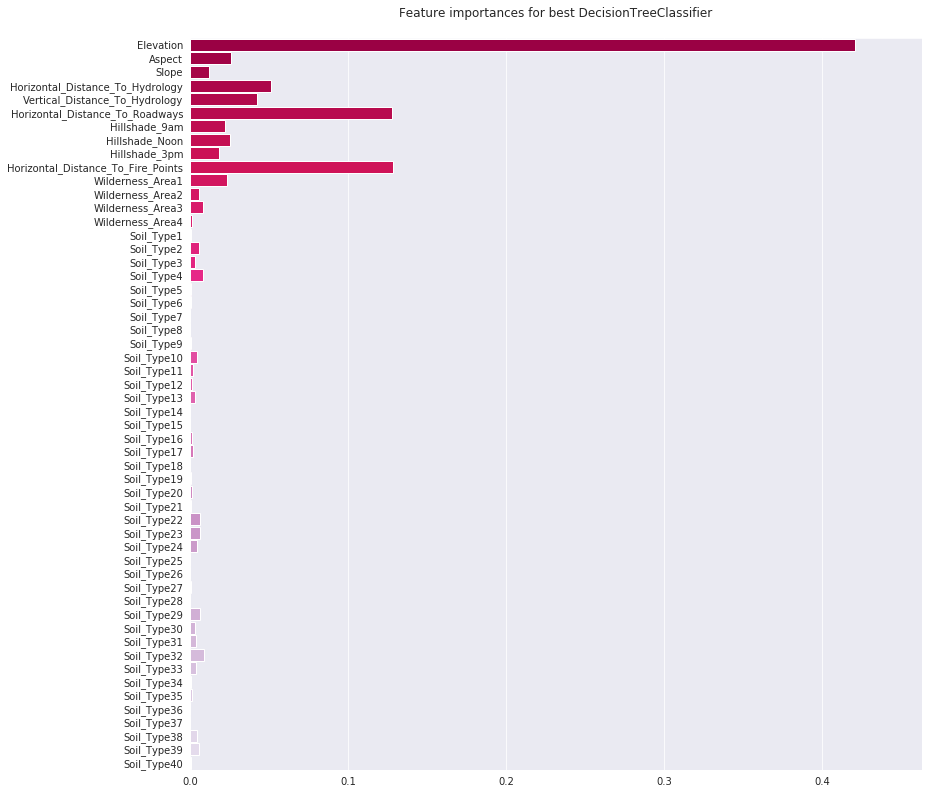

In [14]:
reload(spl)
# make plot of the coefficients/feature importances but don't save
fig, axs = spl.coef_plot(dtc, Xt_train.columns, best_model = True, cmap = "PuRd", cc = 0.25)

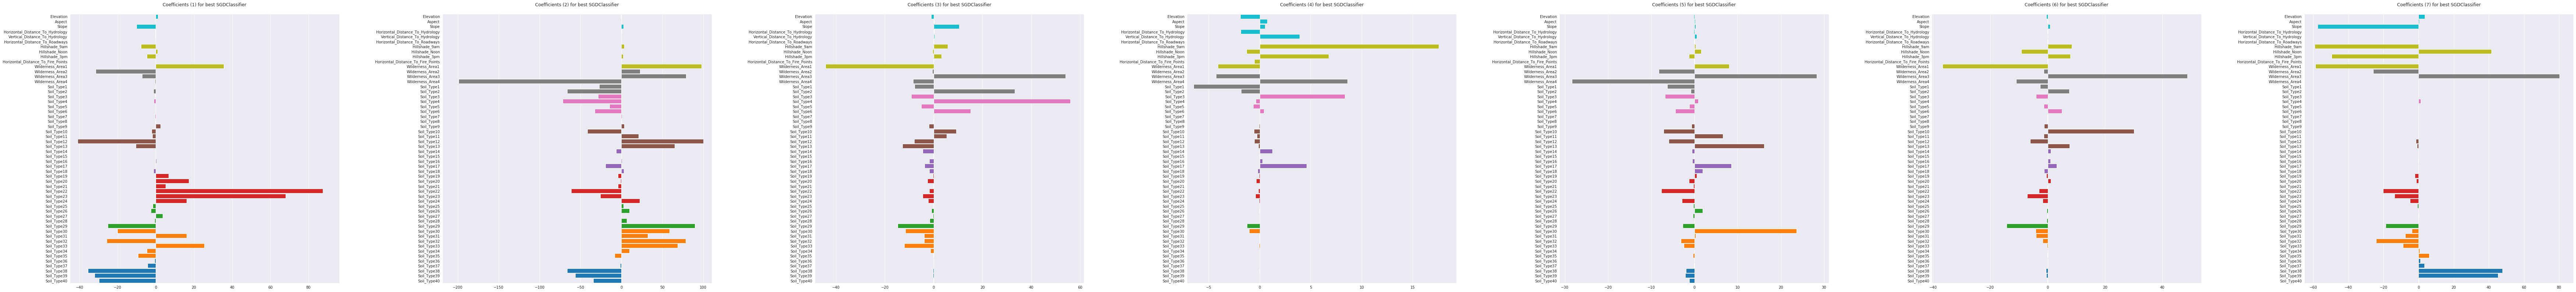

In [15]:
reload(spl)
# make plot of the coefficients/feature importances but don't save
fig, axs = spl.coef_plot(sgdmc, Xt_train.columns, best_model = True, cmap = "tab10", layout = "flush")

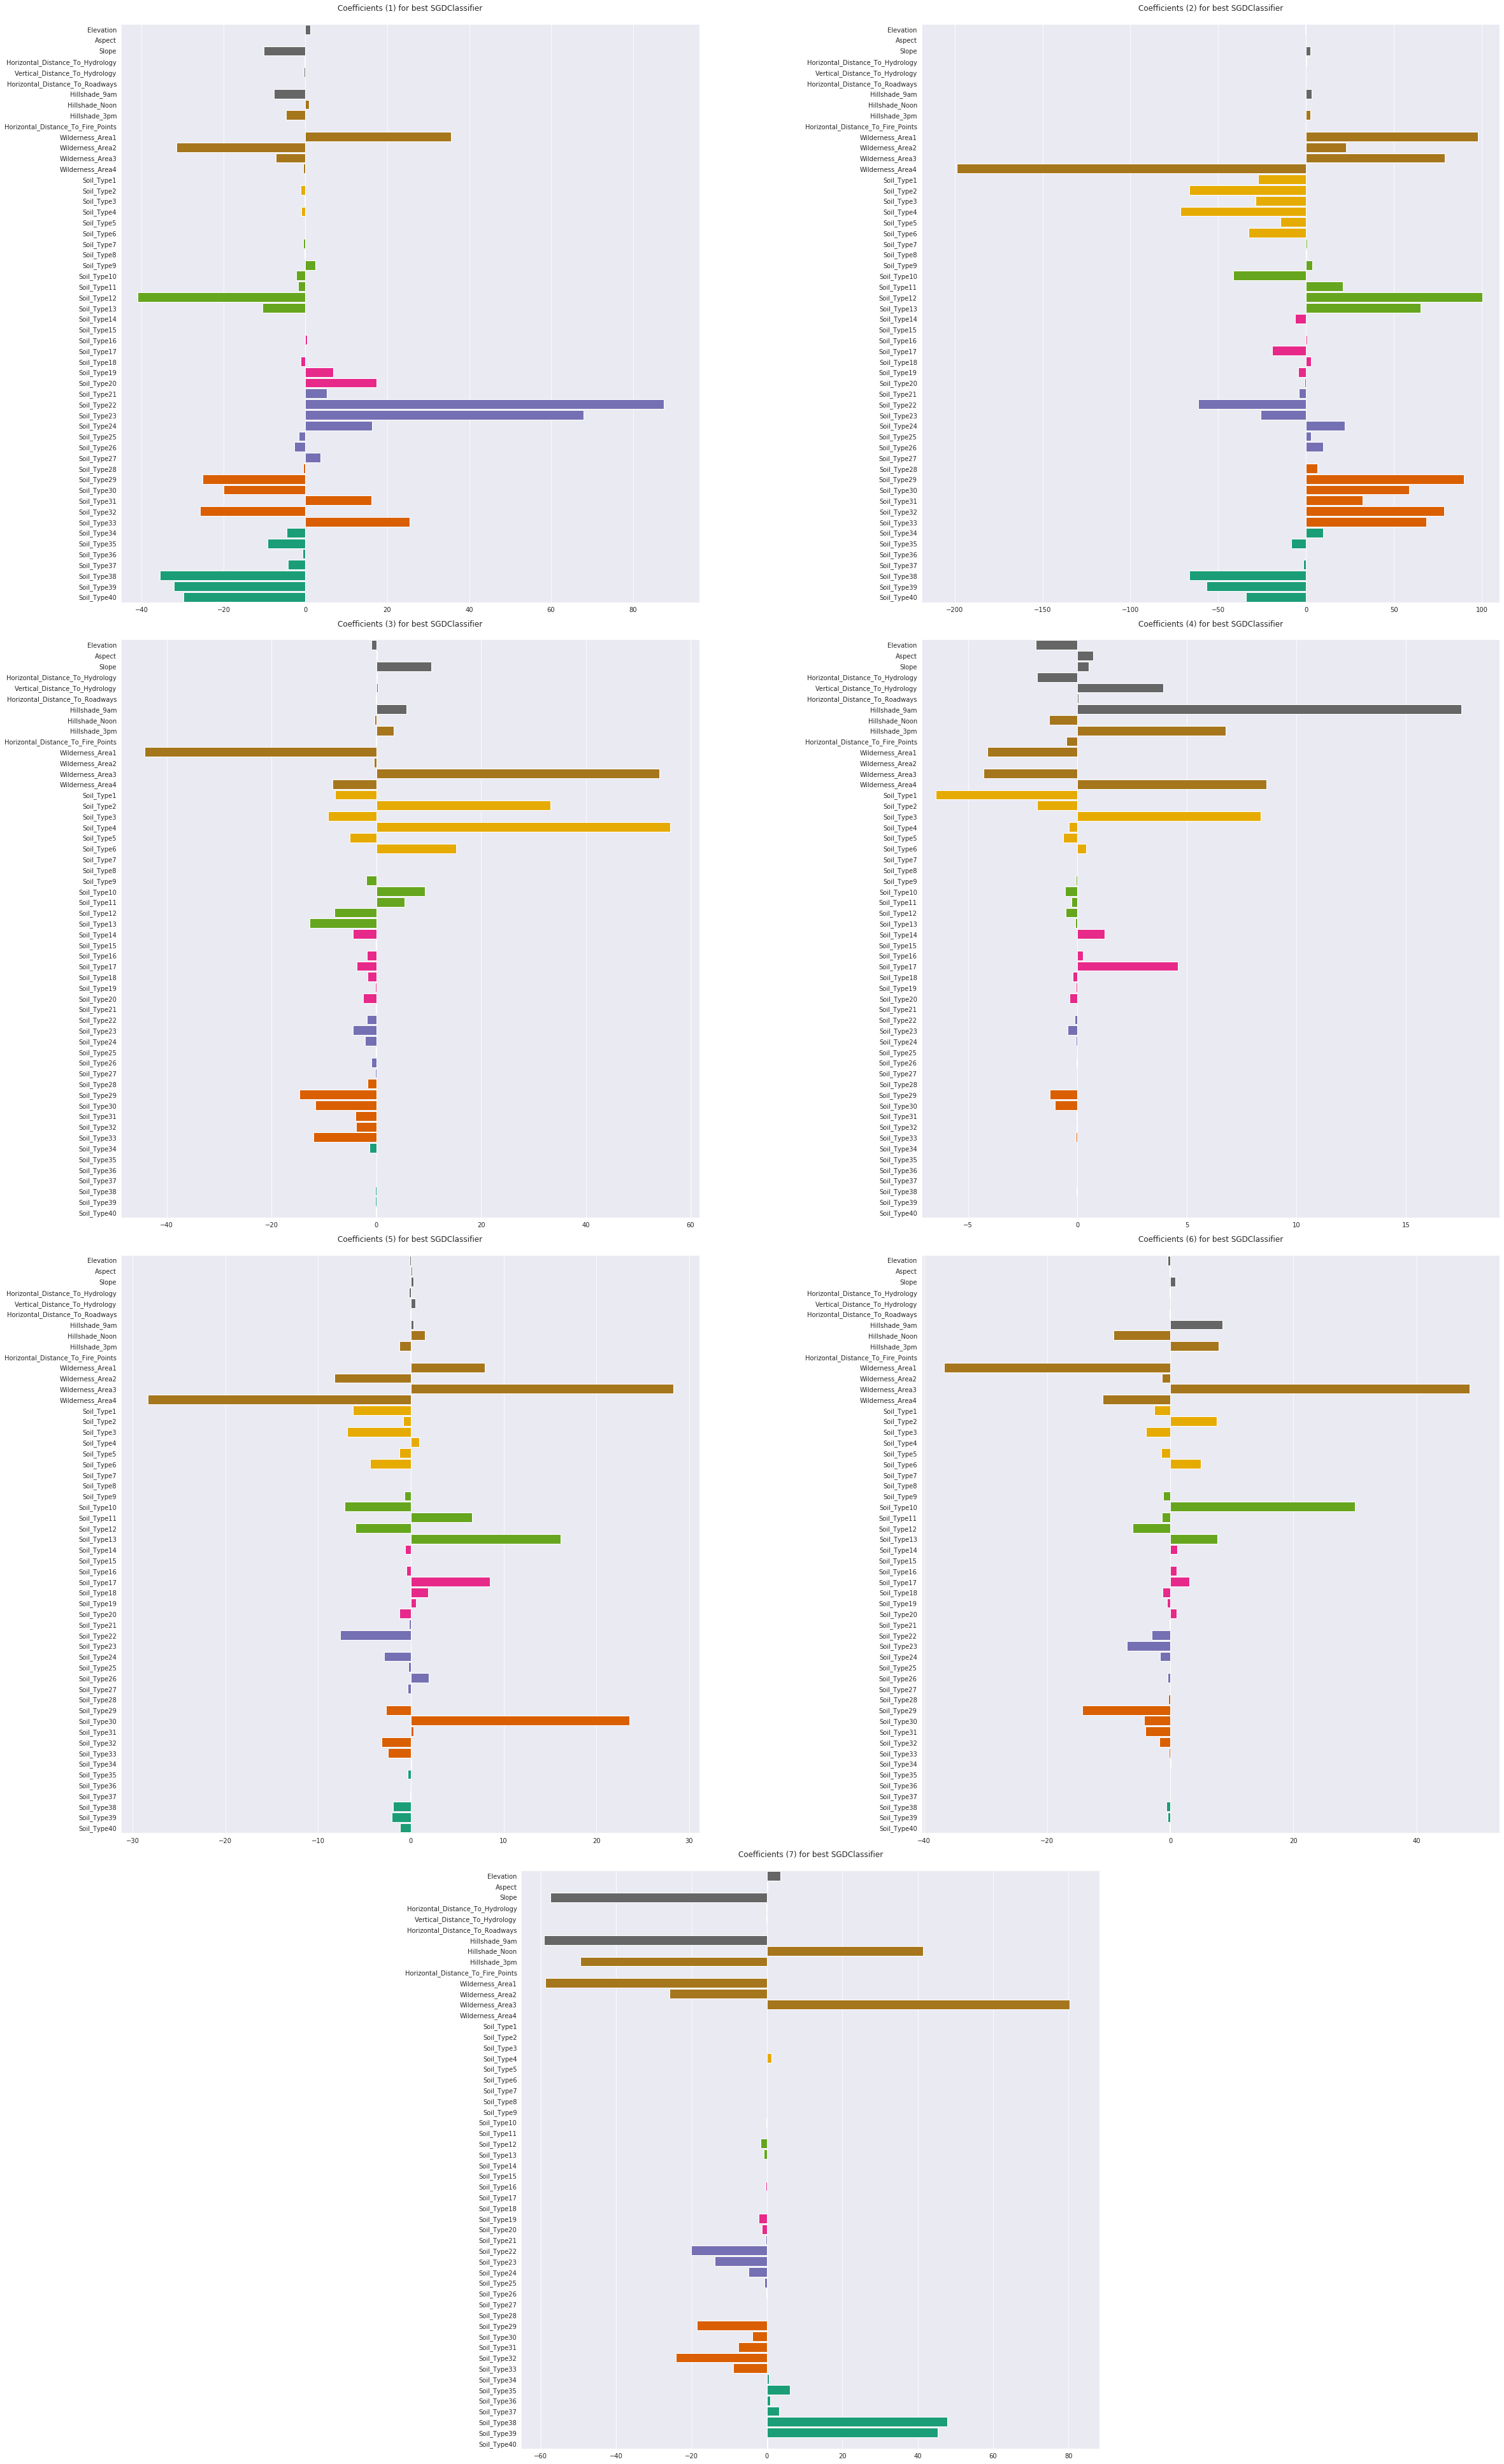

In [17]:
reload(spl)
# make plot of the coefficients/feature importances but don't save
fig, axs = spl.coef_plot(sgdmc, Xt_train.columns, best_model = True, cmap = "Dark2", layout = "dual",
                         outfile = "./test_figures/sgdm_coefplot.png")
fig.tight_layout()

### Addendum: fitting `dtc` and `sgdmc`

Using the forest data used in a previous semester's analysis. Don't run the following cell too many times or you will get a `MemoryError`.

Note the slightly different variable names used.

In [6]:
# get data and clean it + perform train test split (assumes jupyter was started 
# in tomodachi_proj); else have to use absolute file path. already clean data
X_tree = pd.read_csv("./forest_proj/covtype.csv")
X_tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
# get response vector and drop it from X_tree
y_tree = X_tree["Cover_Type"]
X_tree = X_tree.iloc[:, :-1]
# train test split with 80/20 split and constant random state
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tree, y_tree, test_size = 0.2, 
                                                        random_state = 7)
print("Xt_train shape:\t{0}\nXt_test shape:\t{1}".format(Xt_train.shape, Xt_test.shape))
# check out some of the training data
Xt_train.head()

Xt_train shape:	(464809, 54)
Xt_test shape:	(116203, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
508520,3214,14,15,499,108,1080,205,208,137,2297,...,0,0,0,0,0,0,0,0,0,0
471778,3078,48,7,42,0,726,223,225,137,1657,...,0,0,0,0,0,0,0,0,0,0
173902,3178,72,4,67,2,5278,224,232,144,2919,...,0,0,0,0,0,0,0,0,0,0
224984,3074,122,9,366,8,1471,235,233,129,1442,...,0,0,0,0,0,0,0,0,0,0
526452,3251,41,9,319,60,2040,221,221,134,1892,...,0,0,1,0,0,0,0,0,0,0


In [8]:
# fit a simple decision tree (~1 minutes to complete)
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 1)
dtc_params = {"max_depth": [25]}
dtc_gscv = GridSearchCV(dtc, dtc_params, scoring = "accuracy", cv = 5, n_jobs = 2, verbose = 1)
_ = dtc_gscv.fit(Xt_train, yt_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   38.0s finished


In [9]:
# the best model
dtcb = dtc_gscv.best_estimator_
dtcb

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

We also fit a one vs. rest multiclass classifier, as tree-based model natural handle multiclass problems.

In [10]:
# new SGDClassfier (~30 minutes)
_sgdm = SGDClassifier(loss = "hinge", penalty = "l2")
sgdm_params = {"alpha": [0.0001]}
sgdm_gscv = GridSearchCV(_sgdm, sgdm_params, scoring = "accuracy", cv = 5, n_jobs = 2, verbose = 1)
_ = sgdm_gscv.fit(Xt_train, yt_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 25.9min finished
c:\users\d\start\python3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [11]:
# the best model
sgdm = sgdm_gscv.best_estimator_
sgdm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

We save our models and data preprocessing so we don't have to rerun all the cells again. Takes a few seconds, as the data is medium sized. Note that these cells point to the current directory; don't want to overwrite what's in `./test_models` and `./test_data`.

In [159]:
with open("./dtc_gscv.pickle", "wb") as dtc_gscv_file:
    pickle.dump(dtc_gscv, dtc_gscv_file)
with open("./sgdm_gscv.pickle", "wb") as sgdm_gscv_file:
    pickle.dump(sgdm_gscv, sgdm_gscv_file)

In [157]:
Xt_train.to_csv("./Xt_train.csv", index = False)
Xt_test.to_csv("./Xt_test.csv", index = False)
yt_train.to_csv("./yt_train.csv", index = False, header = True)
yt_test.to_csv("./yt_test.csv", index = False, header = True)

c:\users\d\start\python3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
c:\users\d\start\python3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
